In [34]:
import pandas as pd
import nltk
import numpy as np
import scipy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA


In [35]:
data = pd.read_csv('data_cleaned_w_sentiment.csv')
data.head(2)

,date,id,name,text,location,mention,text_clean,tidy_tweet,tokenised,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,sentiment
0,2018-12-31,1079890357540843522,SocialMktgFella,Bitcoin History Part 7: The First Major Hack ...,"Orange County, CA",False,Bitcoin History Part 7: The First Major Hack ...,Bitcoin History Pa First Major Hack hps news b...,"['bitcoin', 'history', 'pa', 'first', 'major',...","['bitcoin', 'history', 'pa', 'first', 'major',...","['bitcoin', 'histori', 'pa', 'first', 'major',...","['bitcoin', 'history', 'pa', 'first', 'major',...",0.000
1,2018-12-31,1079923403518177280,JohnLilic,... but it’s not working. I love you all. Hap...,Global Coverage,False,... but it’s not working. I love you all. Hap...,working love Happy year bitcoin ethereum,"['working', 'love', 'happy', 'year', 'bitcoin'...","['working', 'love', 'happy', 'year', 'bitcoin'...","['work', 'love', 'happi', 'year', 'bitcoin', '...","['working', 'love', 'happy', 'year', 'bitcoin'...",0.836


In [69]:
data.shape

(27045, 13)

In [36]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['bitcoin'])

In [37]:
# removig short words
data.tidy_tweet = data.tidy_tweet.apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head(2)

,date,id,name,text,location,mention,text_clean,tidy_tweet,tokenised,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,sentiment
0,2018-12-31,1079890357540843522,SocialMktgFella,Bitcoin History Part 7: The First Major Hack ...,"Orange County, CA",False,Bitcoin History Part 7: The First Major Hack ...,Bitcoin History First Major Hack news bitcoin ...,"['bitcoin', 'history', 'pa', 'first', 'major',...","['bitcoin', 'history', 'pa', 'first', 'major',...","['bitcoin', 'histori', 'pa', 'first', 'major',...","['bitcoin', 'history', 'pa', 'first', 'major',...",0.000
1,2018-12-31,1079923403518177280,JohnLilic,... but it’s not working. I love you all. Hap...,Global Coverage,False,... but it’s not working. I love you all. Hap...,working love Happy year bitcoin ethereum,"['working', 'love', 'happy', 'year', 'bitcoin'...","['working', 'love', 'happy', 'year', 'bitcoin'...","['work', 'love', 'happi', 'year', 'bitcoin', '...","['working', 'love', 'happy', 'year', 'bitcoin'...",0.836


In [38]:
import re
def clean_text(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', s)
    s = re.sub(r'@\S+', '', s)
    s = re.sub('&amp', ' ', s)
    return s
data.tidy_tweet = data.tidy_tweet.apply(clean_text)

In [39]:
data.isnull().sum()

date                0
id                  0
name                0
text                0
location            0
mention             0
text_clean          0
tidy_tweet          0
tokenised           0
Tweet_nonstop       0
Tweet_stemmed       0
Tweet_lemmatized    0
sentiment           0
dtype: int64

In [40]:
vectorizer = CountVectorizer(stop_words = stopwords)
dtm = vectorizer.fit_transform(data.tidy_tweet)
vocab = vectorizer.get_feature_names()
dtm = dtm.toarray()
vocab = np.array(vocab)

In [41]:
sim = 0
for i in range(len(dtm)):
    if i == 2:
        pass
    else:
        s = cosine_similarity(dtm[2].reshape(1,-1),dtm[i].reshape(1,-1))[0][0]
        if s > sim:
            sim = s
            closest = i
print(sim, closest)

0.31980107453341566 6784


In [42]:
print("tweet 2: ",data.tidy_tweet[2])
print("tweet ", closest,": ", data.tidy_tweet[closest])

tweet 2:  Hasn dawned that write about splinter groups write about Bitcoin thought splinter groups were impoant would write about them wouldn Honestly
tweet  6784 :  just need write bitcoin optimized protocol


# nearest neighbour

In [43]:
for i in range(len(vocab)):
    if dtm[2][i] != 0:
        print(vocab[i], dtm[2][i])

dawned 1
groups 2
honestly 1
impoant 1
splinter 2
thought 1
would 1
write 3


In [44]:
def addItem(itemValue, itemIndex, lst):
    newList = lst + [(itemValue, itemIndex)]
    newList = sorted(newList)
    while len(newList) > 5:
        newList.pop(0)
    return newList

In [45]:
nearestNeighbors=[(0,0)]
for i in range(len(dtm)):
    if i == 2:
        continue
    value = cosine_similarity(dtm[2].reshape(1,-1),dtm[i].reshape(1,-1))[0][0]
    if value > nearestNeighbors[0][0]:
        nearestNeighbors = addItem(value, i, nearestNeighbors)

In [46]:
nearestNeighbors

[(0.24174688920761409, 7427),
 (0.25087260300212727, 24225),
 (0.28603877677367767, 24776),
 (0.3102526139970115, 21538),
 (0.31980107453341566, 6784)]

In [47]:
for tpl in nearestNeighbors:
    print(data.tidy_tweet[tpl[1]])

Indeed great idea write bitcoin lightning data card
know because didn write bitcoin whitepaper also know else didn write whitepaper sure debt gratitude real Satoshi rest peace paved even though wasn first crypto
will excuse must have piece write about Bitcoin Goodbye
Write Your Bitcoin Obituary Time aier aicle write your bitcoin obituary time XNbcu SBQGY twier
just need write bitcoin optimized protocol


In [48]:
users = np.array(data.name)

In [49]:
users_unique = sorted(set(users))
print(len(users_unique))

4266


In [50]:
# Start with an empty array for each user
dtm_users = np.zeros((len(users_unique), len(vocab)))

In [51]:
# Now, for each company we'll store the sum of the frequency of each vocab
# word in the dtm_companies array
for i, user in enumerate(users_unique):
    dtm_users[i, :] = np.sum(dtm[users == user, :], axis=0) 

In [52]:
dist = 1 - cosine_similarity(dtm_users)

In [53]:
linkage_matrix = ward(dist)

In [89]:
# dendogram
plt.figure(figsize=(250,170))
linkage_matrix = ward(dist)
dendrogram(linkage_matrix)
plt.show()

In [20]:
# Group the papers by date
groups = data.groupby('date')

# Determine the size of each group
counts = groups.size()

# Visualise the counts as a bar plot
import matplotlib.pyplot
%matplotlib inline
plt.figure(figsize=(200,150))
# -- YOUR CODE HERE --
counts.plot(kind='bar');

In [21]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

In [22]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['back', 'cha', 'hp', 'points', 'really', 'seen', 'core', 'watch', 'podcast', 'many', 'suppo', 'status', 'email', 'live', 'full', 'rally', 'wants', 'sho', 'ale', 'woh', 'news', 'paper', 'make', 'bloom', 'buff', 'daily', 'medium', 'source', 'twier', 'says', 'aicles', 'hps', 'bitcoin', 'long', 'beer', 'coffee', 'last', 'right', 'possible', 'wish', 'done', 'done', 'well', 'every', 'pizza', 'thanks', 'since', 'much', 'take', 'want', 'getting', 'please', 'years', 'also', 'need', 'still', '2019', '2018', 'think', 'today', 'currently', 'takes', 'within', 'year', 'going', 'cryptocurrencies', 'bitcoin', '000', 'know', 'first', 'could', 'like', 'would', 'time', 'pic', 'com', 'https', 'btc', 'html', 'chart', 'twitter', 'crypto', 'http', 'cryptocurrency', 'just', ])
print(stopwords[0:11])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]


In [23]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words = stopwords)

In [24]:
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data.tidy_tweet)

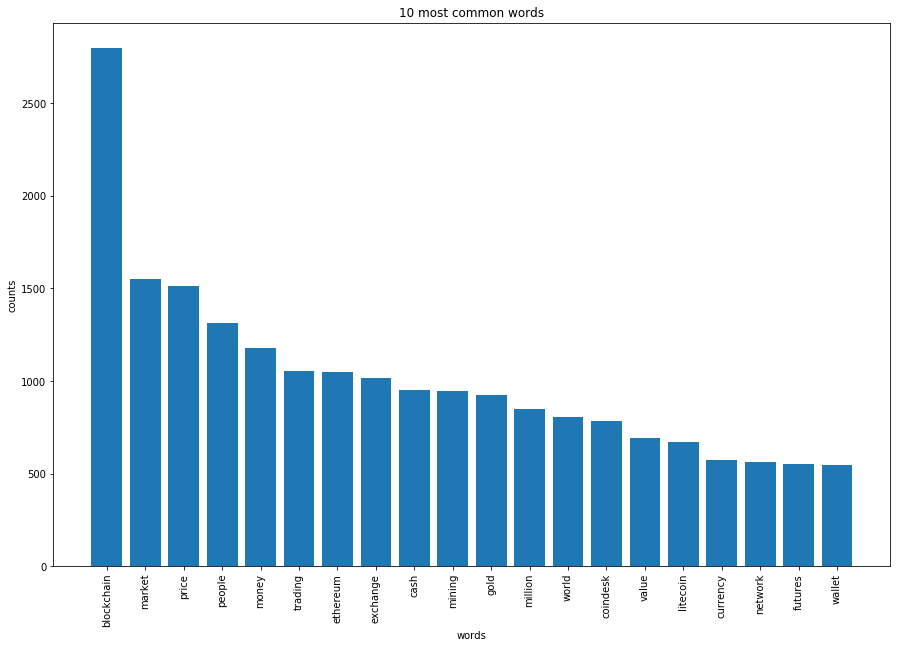

TypeError: 'NoneType' object is not callable

In [25]:
plt.figure(figsize=(15,10))
plot_10_most_common_words(count_data, count_vectorizer)()

In [26]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [66]:
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 10

In [67]:
# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [68]:
# Print the topics found by the LDA model
print("Topics found via sklearn LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via sklearn LDA:

Topic #0:
blockchain million binance mining hackers china craig world technology satoshi

Topic #1:
people money value gold account price hours verified even wallet

Topic #2:
blockchain litecoin ethereum ripple update coindesk bitcoincash ether mining lightning

Topic #3:
trading price market ethereum exchange higher view gold lower million

Topic #4:
blockchain coindesk futures scam cointelegraph repo market world price death
